0.01 0.0 87.0 0.0 0.0
7.038343923500862
0.01 0.0 87.0 0.15 0.0
7.038160590245579


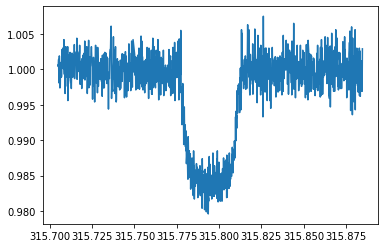

In [1]:
import batman
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy import integrate

# Load the observed light curve data
t, y, err = np.loadtxt('light_curve_GJ1214b.txt', unpack=True)


params = batman.TransitParams()       #object to store transit parameters
params.t0 = t.mean()                        #time of inferior conjunction
params.per = t.max() - t.min()                       #orbital period

params.limb_dark = "linear"        #limb darkening model
params.u = [0.3]      #limb darkening coefficients [u1]

chi2min = 1.e80

# Definición del mallado del espacio de parámetros:
nrp = 100;  rpmin = 0.0100;  rpmax = 0.200
arp = np.arange(nrp)/(nrp-1)*(rpmax - rpmin) + rpmin
na = 100;  amin = 0.;  amax = 1
aa = np.arange(na)/(na-1)*(amax - amin) + amin
ninc = 50;  incmin = 87;  incmax = 90
ainc = np.arange(ninc)/(ninc-1)*(incmax - incmin) + incmin
necc = 100;  eccmin = 0;  eccmax = 0.15
aecc = np.arange(necc)/(necc-1)*(eccmax - eccmin) + eccmin
nw = 10;  wmin = 0;  wmax = 0.1
aw = np.arange(nw)/(nw-1)*(wmax - wmin) + wmin
likelihood=np.zeros([nrp, na, ninc, necc, nw])

# Exploración del espacio de parámetros:
for i in 0,nrp-1:
    for j in 0, na-1:
        for k in 0, ninc-1:
            for z in 0, necc-1:
                for ww in 0, nw-1:
                    params.rp = arp[i]
                    params.a = aa[j]
                    params.inc = ainc[k]
                    params.ecc = aecc[z]
                    params.w = aw[ww]
                    m = batman.TransitModel(params, t)    #initializes model
                    flux = m.light_curve(params)
                    chi2 = np.sum((y-flux)**2/err**2)
                    #  likelihood[i,j,k,z,ww] = np.exp(-0.5*(chi2min/1461.)) 
                    if chi2 < chi2min:
                        chi2min = chi2
                        rp = params.rp
                        a = params.a
                        inc = params.inc
                        ecc = params.ecc
                        w = params.w
                        parametros_min = print(rp, a, inc, ecc, w)
                        print(chi2min/1461.)
                        #print(a)
                        likelihood[i,j,k,z,ww] = np.exp(-0.5*(chi2min/1461.))  

# grafico del mejor ajuste sobre los datos

mejor_modelo = batman.TransitModel(params, t)
mejor_flujo = mejor_modelo.light_curve(params)

plt.plot(t,y)


# Contornos de probabilidad:                                         
# --- Probability contours and distributions:
# likelihood depends on 5 parameters, rp, a, inc, ecc, w.
# 4-parameters:
prob_rp_a_inc_ecc = np.zeros([nrp,na,ninc,necc])
prob_rp_a_inc_w = np.zeros([nrp,na,ninc,nw])
prob_rp_inc_ecc_w = np.zeros([nrp,ninc,necc,nw])

# 3-parameters:
prob_rp_a_inc = np.zeros([nrp,na,ninc])
prob_rp_a_ecc = np.zeros([nrp,na,necc])
prob_rp_a_w = np.zeros([nrp,na,nw])
prob_inc_ecc_w = np.zeros([ninc,necc,nw])

# 2-parameters:
prob_rp_a = np.zeros([nrp,na])
prob_rp_inc = np.zeros([nrp,ninc])
prob_rp_ecc = np.zeros([nrp,necc])
prob_rp_w = np.zeros([nrp,nw])
prob_a_inc = np.zeros([na,ninc])
prob_a_ecc = np.zeros([na,necc])
prob_a_w = np.zeros([na,nw])
prob_inc_ecc = np.zeros([ninc,necc])
prob_inc_w = np.zeros([ninc,nw])
prob_ecc_w = np.zeros([necc,nw])

# 1-parameter: distribution function
prob_rp = np.zeros(nrp)
prob_a = np.zeros(na)
prob_inc = np.zeros(ninc)
prob_ecc = np.zeros(necc)
prob_w = np.zeros(nw)

# --- numerical integration:
step = 0.01
for i in range(nrp):
    for j in range(na):
        for k in range(ninc):
            for l in range(necc):
                prob_rp_a_inc_ecc[i,j,k,l] = np.trapz(likelihood[i,j,k,l,:],aw[:],dx=step)

for i in range(nrp):
    for j in range(na):
        for k in range(ninc):
            for l in range(nw):
                prob_rp_a_inc_w[i,j,k,l] = np.trapz(likelihood[i,j,k,:,l],aecc[:],dx=step)

for i in range(nrp):
    for j in range(ninc):
        for k in range(necc):
            for l in range(nw):
                prob_rp_inc_ecc_w[i,j,k,l] = np.trapz(likelihood[i,:,j,k,l],aa[:],dx=step)


# probability contours 3-parameters
for i in range(nrp):
    for j in range(na):
        for k in range(ninc):
            prob_rp_a_inc[i,j,k] = np.trapz(prob_rp_a_inc_ecc[i,j,k,:],aecc[:],dx=step)

for i in range(nrp):
    for j in range(na):
        for k in range(necc):
            prob_rp_a_ecc[i,j,k] = np.trapz(prob_rp_a_inc_ecc[i,j,:,k],ainc[:],dx=step)


for i in range(nrp):
    for j in range(na):
        for k in range(nw):
            prob_rp_a_w[i,j,k] = np.trapz(prob_rp_a_inc_w[i,j,:,k],ainc[:],dx=step)

for i in range(ninc):
    for j in range(necc):
        for k in range(nw):
            prob_inc_ecc_w[i,j,k] = np.trapz(prob_rp_inc_ecc_w[:,i,j,k],arp[:],dx=step)



# probability contours 2-parameters
for i in range(nrp):
    for j in range(na):
        prob_rp_a[i,j] = np.trapz(prob_rp_a_inc[i,j,:],ainc[:],dx=step)

for i in range(nrp):
    for j in range(ninc):
        prob_rp_inc[i,j] = np.trapz(prob_rp_a_inc[i,:,j],aa[:],dx=step)

for i in range(nrp):
    for j in range(necc):
        prob_rp_ecc[i,j] = np.trapz(prob_rp_a_ecc[i,:,j],aa[:],dx=step)

for i in range(nrp):
    for j in range(nw):
        prob_rp_w[i,j] = np.trapz(prob_rp_a_w[i,:,j],aa[:],dx=step)

for i in range(na):
    for j in range(ninc):
        prob_a_inc[i,j] = np.trapz(prob_rp_a_inc[:,i,j],arp[:],dx=step)

for i in range(na):
    for j in range(necc):
        prob_a_ecc[i,j] = np.trapz(prob_rp_a_ecc[:,i,j],arp[:],dx=step)

for i in range(na):
    for j in range(nw):
        prob_a_w[i,j] = np.trapz(prob_rp_a_w[:,i,j],arp[:],dx=step)

for i in range(ninc):
    for j in range(necc):
        prob_inc_ecc[i,j] = np.trapz(prob_inc_ecc_w[i,j,:],aw[:],dx=step)

for i in range(ninc):
    for j in range(nw):
        prob_inc_w[i,j] = np.trapz(prob_inc_ecc_w[i,:,j],aecc[:],dx=step)

for i in range(necc):
    for j in range(nw):
        prob_ecc_w[i,j] = np.trapz(prob_inc_ecc_w[:,i,j],ainc[:],dx=step)

# probability contours 1-parameters
for i in range(nrp):
    prob_rp[i] = np.trapz(prob_rp_a[i,:],aa[:],dx=step)

for i in range(na):
    prob_a[i] = np.trapz(prob_rp_a[:,i],arp[:],dx=step)

for i in range(ninc):
    prob_inc[i] = np.trapz(prob_rp_inc[:,i],arp[:],dx=step)

for i in range(necc):
    prob_ecc[i] = np.trapz(prob_rp_ecc[:,i],arp[:],dx=step)

for i in range(nw):
    prob_w[i] = np.trapz(prob_rp_w[:,i],arp[:],dx=step)


# Plots:
#cp = plt.contour(aa,ainc,prob_a_inc)
#cp = plt.contour(arp,aa,prob_rp_a)
#cp = plt.contour(arp,ainc,prob_rp_inc)
#cp = plt.contour(arp,aecc,prob_rp_ecc)
#cp = plt.contour(arp,aw,prob_rp_w)
#cp = plt.contour(aa,ainc,prob_a_inc)

#In [41]: plt.show()